#Khachatrian Armen 
##Selection bias



In [ ]:
%matplotlib inline
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.special
plt.style.use('seaborn-dark')


In [ ]:
# Total number of persons in the study
# Set large enough to make sampling variation negligible.
N = 10 ** 6

# Each person has an individual level of "charitability".
# We'll model this charitability as being normally distributed.
charitability = np.random.normal(loc=-1, scale=0.5, size=N)


# Draw the potential outcomes from a lognormal distribution.
# The outcome Y0 has a mean based on the charitability level:
# A higher charitability tends to increase the donation amount.
# Y1 is set to be identical to Y0. This means the ad has no effect!
Y0 = np.random.lognormal(mean=(charitability + 0.5), sigma=0.1, size=N)
Y1 = Y0.copy()

# The probability of searching for Doctors Without Borders is
# a function of the charitability level. People who are more 
# charitable are more likely to search for DWB.
# We assume that anyone who searches for DWB will see the DWB ad.
prob_search_dwb = scipy.special.expit(charitability)
D = np.random.binomial(n=1, p=prob_search_dwb)

# Calculate the *actual* outcome.
Y = Y1 * D + Y0 * (1 - D)

# Put the data together for analysis.
df = pd.DataFrame({
    'D': D, 
    'Y0': Y0, 
    'Y1': Y1, 
    'Y': Y, 
    'delta': Y1 - Y0,
    'C': charitability,
})


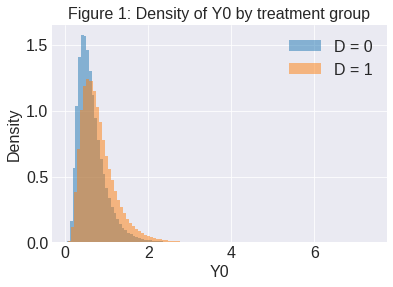

In [ ]:
column_to_plot = 'Y0'
ax = df.query('D==0')[column_to_plot].hist(bins=100, alpha=0.5, density=True, label='D = 0')
ax = df.query('D==1')[column_to_plot].hist(bins=100, alpha=0.5, density=True, ax=ax, label='D = 1')
ax.legend(fontsize=16)
ax.set_xlabel(column_to_plot, fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.set_title("Figure 1: Density of {} by treatment group".format(column_to_plot), fontsize=16)
ax.tick_params(labelsize=16)
 

In [ ]:
# Tabulate all the averages sliced by treatment vs. control
df.groupby('D').mean()

,Y0,Y1,Y,delta,C
D,,,,,
0,0.64158,0.64158,0.64158,0.0,-1.067874
1,0.81539,0.81539,0.81539,0.0,-0.827938


In [ ]:
# Here's another way to calculate the averages from the table.

# Calculate E[Y]
df['Y'].mean()

# Calculate E[Y0 | D=0]
print("E[Y0|D=0] = {}".format(df.query("D == 0")['Y0'].mean()))

print("E[Y1|D=1] = {}".format(df.query("D == 1")['Y1'].mean()))

print("E[Y1|D=1] - E[Y0|D=0] = {}".format(df.query("D == 1")['Y1'].mean() - df.query("D == 0")['Y0'].mean()))

E[Y0|D=0] = 0.6415796421899248
E[Y1|D=1] = 0.8153898355300789
E[Y1|D=1] - E[Y0|D=0] = 0.17381019334015413


# Exercises

Read the comments in the code. They should help you!

## Warm-up

1. Calculate $E[Y^1 - Y^0]$

2. Calculate the $NATE$

3. Calculate the selection bias

4. What is the key line of code fundamentally creates the selection bias? Explain.

5. Calculate $P(D = 1)$

## Experiment

7. Make a version of this data-generating process that is a true randomized experiment. The new treatment variable should be $D_\text{exp}$. Make the overall probability of treatment the same, i.e., $P(D=1) = P(D_\text{exp}=1)$. Show that the experiment eliminates selection bias. Calculate the $NATE$.

8. Interpret figure 1 w.r.t. the *independence assumption*: $(Y^1, Y^0) \perp D$.

9. Make a new version of figure 1 using the experiment data. Compare.

## Adding a treatment effect

10. Make a version of the biased data-generating process with an ATE=0.3. Calculate the NATE. (Hint: This only requires changing one line.)

11. Repeat the $D_\text{exp}$ experiment to show that NATE=ATE=0.3.

## Extensions

In the homework you will build on these exercises to explore the differential effect bias and understand the meaning of "identification."

# Exercises

## Warm-up

In [ ]:
#1
#E[Y_1 - Y_0] = E[Y_1]-E[Y_0]
#ATE = 0 as variables are the same, consequently, the mean will be the same
Y1mean = df['Y1'].mean()
Y0mean = df['Y0'].mean() 
ate = Y1mean - Y0mean
print ("E[Y_1 - Y_0] = ", ate)

E[Y_1 - Y_0] =  0.0


In [ ]:
#2
#NATE = E[Y_1|D=1]-E[Y_0|D=0]
nate = df.query("D == 1")['Y1'].mean() - df.query("D == 0")['Y0'].mean()
print("NATE =", nate)

NATE = 0.17381019334015413


In [ ]:
#3
#Selection bias is a difference in Y0 between the treatment and the control groups
#Selection bias = E[Y_0|D=1] - E[Y_0|D=0]
Selbias = df.query("D == 1")['Y0'].mean() - df.query("D == 0")['Y0'].mean()
print("Selection bias = ", Selbias)

Selection bias =  0.17381019334015413


In [ ]:
#4
print("I suppose that selection bias could exist only if the both groups are different even in the absence of the treatment")
print("D = np.random.binomial(n=1, p=prob_search_dwb)")

I suppose that selection bias could exist only if the both groups are different even in the absence of the treatment
D = np.random.binomial(n=1, p=prob_search_dwb)


In [ ]:
#5
#P(Y=k) = n!/((n-k)!k!) *p^k*(1-p)^(n-k) 
#pd = P(D=1)
pdd = prob_search_dwb.mean()
print("𝑃(𝐷=1) = ", pdd)

𝑃(𝐷=1) =  0.2792499088212677


## Experiment

In [ ]:
#ADDED
Y0 = np.random.lognormal(mean=(charitability + 0.5), sigma=0.1, size=N)
Y1 = Y0.copy() + 0.3

In [ ]:
#7
Dexp = np.random.binomial(n=1, p=pdd, size = N)
dd = {'Dexp': Dexp, 'Y0': Y0, 'Y1': Y1, 'Y': Y, 'delta': Y1 - Y0}

In [ ]:
dff = pd.DataFrame({'Dexp': Dexp, 'Y0': Y0, 'Y1': Y1, 'Y': Y, 'delta': Y1 - Y0})

In [ ]:
Selbiasnew = dff.query("Dexp == 1")['Y0'].mean() - dff.query("Dexp == 0")['Y0'].mean()
Selbiasnew

0.00065273894989748

In [ ]:
nate1 = dff.query("Dexp == 1")['Y1'].mean() - dff.query("Dexp == 0")['Y0'].mean()
nate1

0.30065273894987843

In [ ]:
#8
# the graph will be approximately the same as we have no dependence between Y0 and D where D=0 or D=1
 

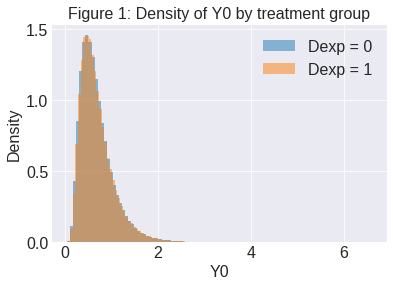

In [ ]:
#9
column_to_plot = 'Y0'
ax = dff.query('Dexp==0')[column_to_plot].hist(bins=100, alpha=0.5, density=True, label='Dexp = 0')
ax = dff.query('Dexp==1')[column_to_plot].hist(bins=100, alpha=0.5, density=True, ax=ax, label='Dexp = 1')
ax.legend(fontsize=16)
ax.set_xlabel(column_to_plot, fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.set_title("Figure 1: Density of {} by treatment group".format(column_to_plot), fontsize=16)
ax.tick_params(labelsize=16)

In [ ]:
ate_exp = dff['Y1'].mean() - dff['Y0'].mean()
print(ate_exp)

0.300000000000024


In [ ]:
#10
Y0 = np.random.lognormal(mean=(charitability + 0.5), sigma=0.1, size=N)
Y1 = Y0.copy() + 0.3 


prob_search_dwb = scipy.special.expit(charitability)
D = np.random.binomial(n=1, p=prob_search_dwb)

# Calculate the *actual* outcome.
Y = Y1 * D + Y0 * (1 - D)

# Put the data together for analysis.
df = pd.DataFrame({
    'D': D, 
    'Y0': Y0, 
    'Y1': Y1, 
    'Y': Y, 
    'delta': Y1 - Y0,
    'C': charitability,
})
nate = df.query("D == 1")['Y1'].mean() - df.query("D == 0")['Y0'].mean() 
nate

0.4737513288218915

In [ ]:
#ADDED
# Tabulate all the averages sliced by treatment vs. control
df.groupby('D').mean()

,Y0,Y1,Y,delta,C
D,,,,,
0,0.642836,0.942836,0.642836,0.3,-1.066179
1,0.816587,1.116587,1.116587,0.3,-0.827034


In [ ]:
#11
Dexp = np.random.binomial(n=1, p=pdd, size = N)
Y0 = np.random.lognormal(mean=(charitability + 0.5), sigma=0.1, size=N)
Y1 = Y0.copy() + 0.3 
dd = {'Dexp': Dexp, 'Y0': Y0, 'Y1': Y1, 'Y': Y, 'delta': Y1 - Y0}
dff = pd.DataFrame({'Dexp': Dexp, 'Y0': Y0, 'Y1': Y1, 'Y': Y, 'delta': Y1 - Y0})
nate = dff.query("Dexp == 1")['Y1'].mean() - dff.query("Dexp == 0")['Y0'].mean() 
nate

0.30065806408444773